<a href="https://colab.research.google.com/github/Gaurav1401/Deep-Learning/blob/main/Practice/Regression/Regression_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import warnings as wg
wg.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:xlabel='price', ylabel='Density'>

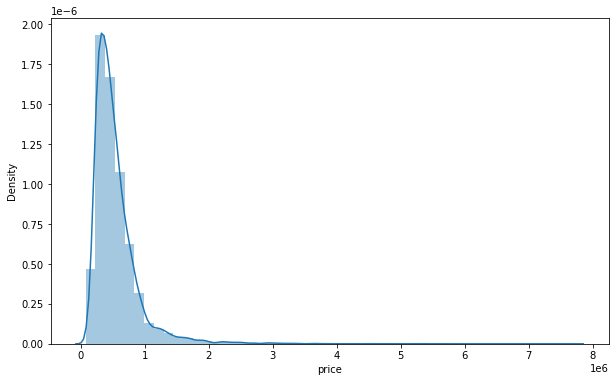

In [ ]:
plt.figure(figsize = (10, 6))
sns.distplot(df['price'])

**We can clearly see that there are some outliers in this**

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

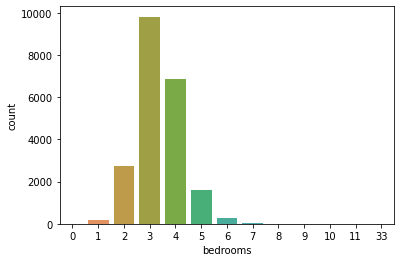

In [ ]:
sns.countplot(df['bedrooms'])

**Few houses even have 11 and 33 bedrooms**

**Now, let's check what features are correlated with our target variable 'price'**

In [ ]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

**Let's check the relation of highly correlated values with scatterplot**

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

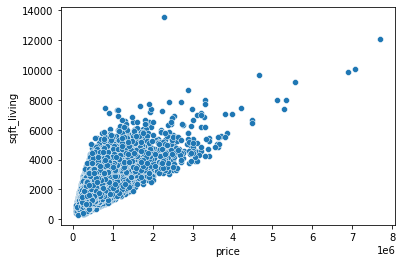

In [ ]:
sns.scatterplot(x = 'price', y= 'sqft_living', data = df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

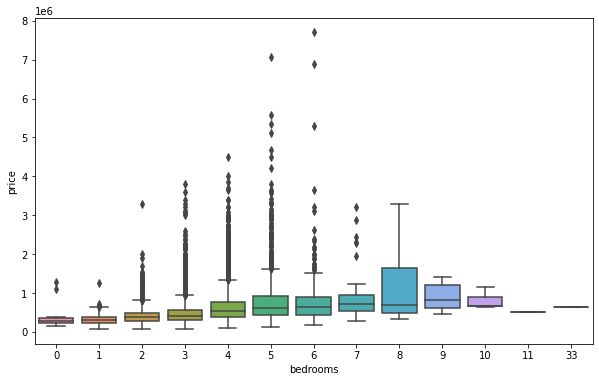

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'bedrooms', y= 'price')

<AxesSubplot:xlabel='price', ylabel='lat'>

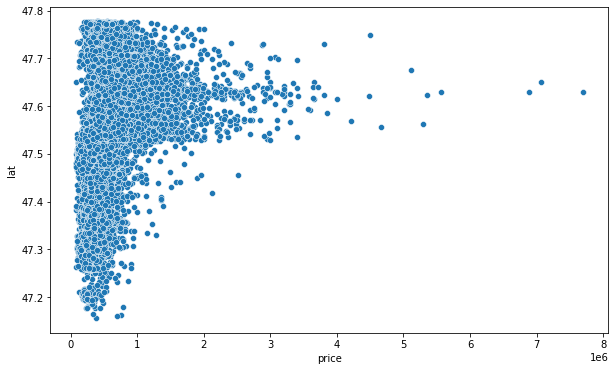

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'price', y= 'lat', data = df)

**There is some latitude location which is more suitable for houses as it has more house number density**

<AxesSubplot:xlabel='price', ylabel='long'>

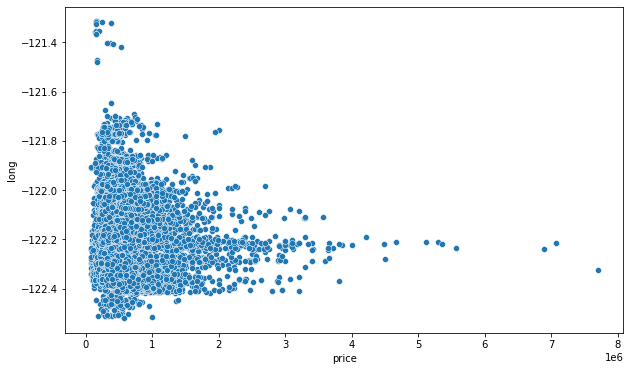

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'price', y= 'long', data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

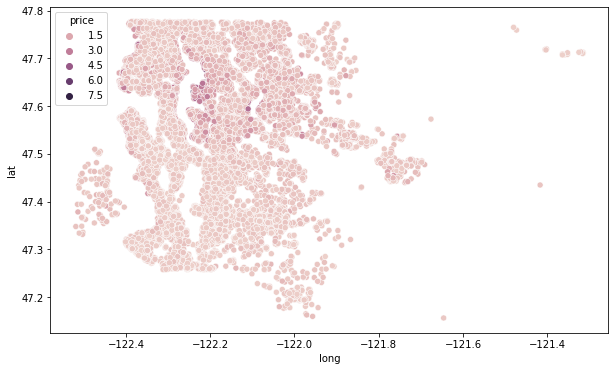

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'long', y= 'lat', data = df, hue = 'price')

In [ ]:
non_top_1perc = df.sort_values(by = 'price', ascending = False).iloc[216:] # removing top 1% of the values

<AxesSubplot:xlabel='long', ylabel='lat'>

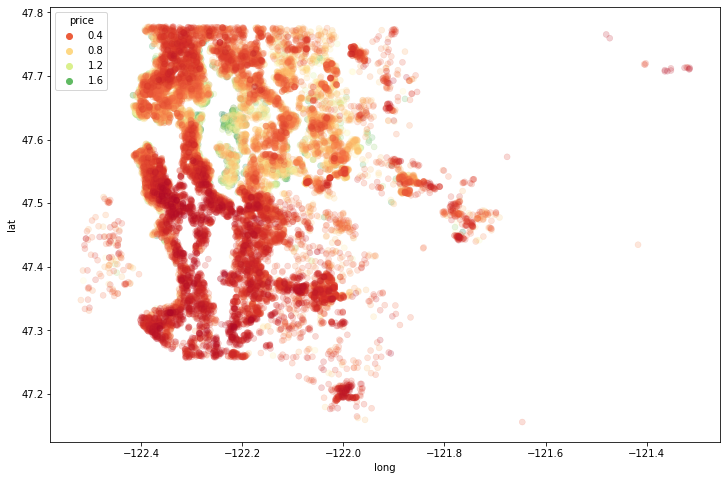

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1perc,
               edgecolor = None, alpha = 0.2, hue = 'price',
               palette = 'RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

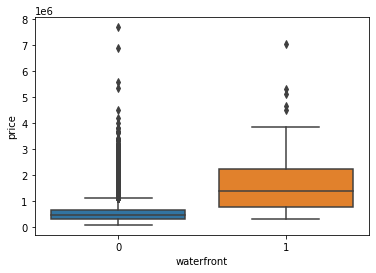

In [ ]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

In [ ]:
df = df.drop('id', axis = 'columns')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

**Checking whether the house sold price depends on the month in which they are sold or not**

<AxesSubplot:xlabel='month', ylabel='price'>

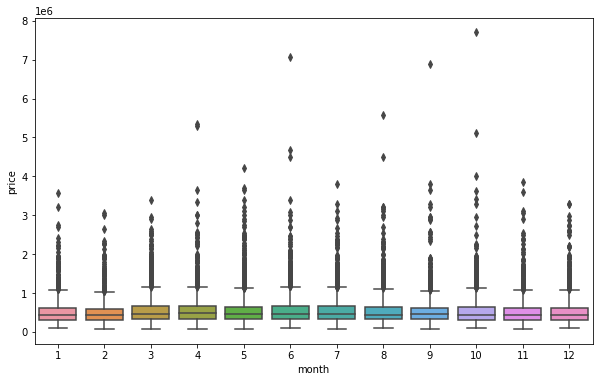

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'month', y = 'price', data = df)

<AxesSubplot:xlabel='month'>

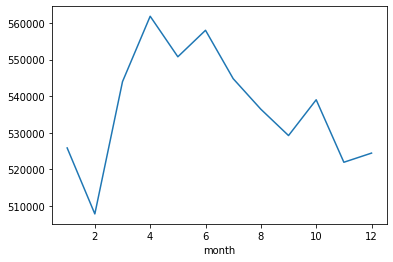

In [ ]:
df.groupby('month')['price'].mean().plot()

<AxesSubplot:xlabel='year'>

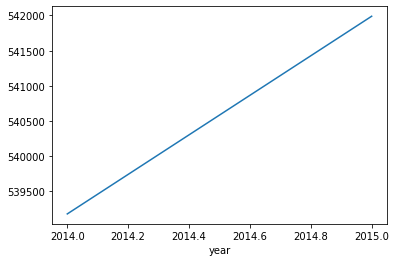

In [ ]:
df.groupby('year')['price'].mean().plot()

**House price increases as time passes, maybe due to inflation**

**Removing the original date column**

In [ ]:
df = df.drop('date', axis = 'columns')

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [ ]:
df = df.drop('zipcode', axis = 'columns')

In [ ]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

**0 means that the housse wasn't renovated, but it is not a year so it is better to classify this column as renovated and non renovated**

In [ ]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

In [ ]:
X = df.drop('price', axis = 1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit(x = X_train, y = y_train, 
         validation_data = (X_test, y_test),
         batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 438506683323.7333 - val_loss: 432953753600.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 420943287910.4000 - val_loss: 426445045760.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 412370290278.4000 - val_loss: 367393505280.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 325494401433.6000 - val_loss: 197703942144.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 152043148970.6667 - val_loss: 106135420928.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 102080521420.8000 - val_loss: 102806773760.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97002559351.4667 - val_loss: 100997496832.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 103951939242.6667 - val_loss: 99105406976.0000
Epoch 9/400
119/11

In [ ]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

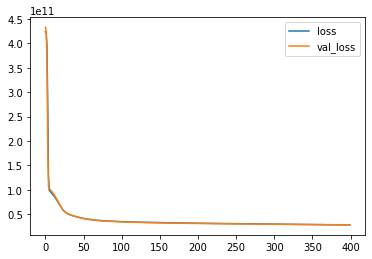

In [ ]:
losses.plot()

**Both training loos and validation loss are overlapping so we are not overfitting and could continue training further**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
predictions = model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions))

167312.4949829068

In [ ]:
mean_absolute_error(y_test, predictions)

103474.75614433124

In [ ]:
explained_variance_score(y_test, predictions)

0.8009825354292954

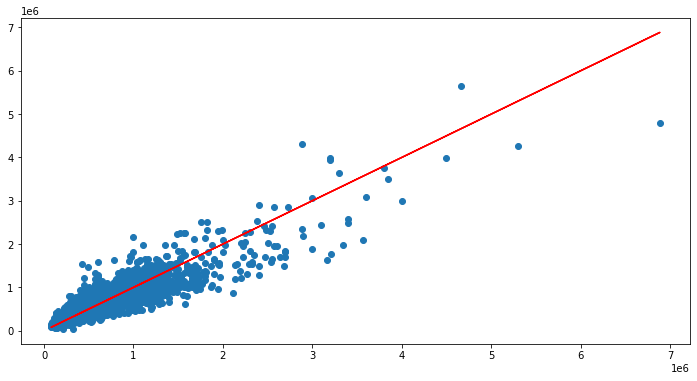

In [ ]:
plt.figure(figsize = (12, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r') # perfect prediction line

In [ ]:
single_house = df.drop('price', axis = 1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [ ]:
model.predict(single_house)

array([[278094.44]], dtype=float32)

In [ ]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
